# Covid cases Dataset

# Importing required Libraries

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter('ignore')
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('covid_cases.csv')
df

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0
...,...,...,...,...,...
23683,2020-05-26,West Bank and Gaza,429,365,3
23684,2020-05-26,Western Sahara,9,6,1
23685,2020-05-26,Yemen,249,10,49
23686,2020-05-26,Zambia,920,336,7


In [28]:
import datetime

In [29]:
df['year']=pd.DatetimeIndex(df['Date']).year

In [3]:
df.shape

(23688, 5)

In [4]:
df.dtypes

Date         object
Country      object
Confirmed     int64
Recovered     int64
Deaths        int64
dtype: object

In [5]:
df.head()#first 5 data

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0


In [6]:
df.tail()#last 5 data

,Date,Country,Confirmed,Recovered,Deaths
23683,2020-05-26,West Bank and Gaza,429,365,3
23684,2020-05-26,Western Sahara,9,6,1
23685,2020-05-26,Yemen,249,10,49
23686,2020-05-26,Zambia,920,336,7
23687,2020-05-26,Zimbabwe,56,25,4


In [7]:
df['Confirmed'].value_counts()

0         8056
1          799
2          310
3          293
16         223
          ... 
3638         1
110130       1
17967        1
1559         1
3958         1
Name: Confirmed, Length: 5308, dtype: int64

In [8]:
df['Deaths'].value_counts()

0        12989
1         1244
2          655
3          550
4          324
         ...  
473          1
4603         1
521          1
2600         1
30689        1
Name: Deaths, Length: 1768, dtype: int64

In [9]:
df['Recovered'].value_counts()

0         11100
1           866
2           517
4           264
3           262
          ...  
4869          1
41731         1
361239        1
8063          1
6141          1
Name: Recovered, Length: 3303, dtype: int64

In [10]:
df['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guin

# Data Preparation

In [11]:
df.describe()#statistics values

,Confirmed,Recovered,Deaths
count,2.368800e+04,23688.000000,23688.000000
mean,7.969368e+03,2581.801714,526.935030
std,5.842109e+04,15143.101257,3992.815956
min,0.000000e+00,0.000000,0.000000
25%,0.000000e+00,0.000000,0.000000
50%,1.800000e+01,1.000000,0.000000
75%,7.300000e+02,123.000000,13.000000
max,1.680913e+06,384902.000000,98913.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23688 entries, 0 to 23687
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       23688 non-null  object
 1   Country    23688 non-null  object
 2   Confirmed  23688 non-null  int64 
 3   Recovered  23688 non-null  int64 
 4   Deaths     23688 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 740.3+ KB


In [13]:
df.isnull().sum() #checking for missing values

Date         0
Country      0
Confirmed    0
Recovered    0
Deaths       0
dtype: int64

In [14]:
df.Country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guin

No null values are present hence no need of treating data.

# EDA

# Univariate analysis

In [15]:
dfcor=df.corr()
dfcor

,Confirmed,Recovered,Deaths
Confirmed,1.000000,0.810991,0.929718
Recovered,0.810991,1.000000,0.778094
Deaths,0.929718,0.778094,1.000000


<AxesSubplot:>

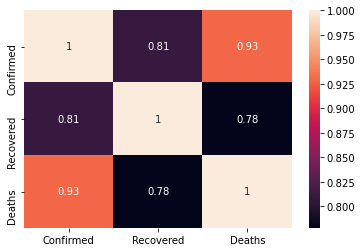

In [16]:
import seaborn as sn
sn.heatmap(dfcor,annot=True)

<AxesSubplot:ylabel='Frequency'>

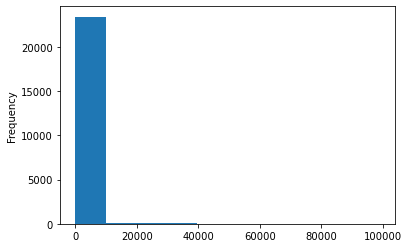

In [17]:
df['Deaths'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

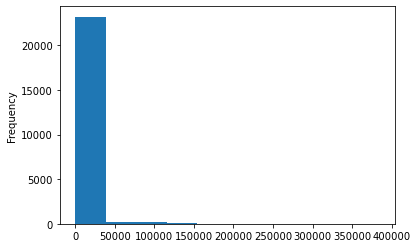

In [18]:
df['Recovered'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

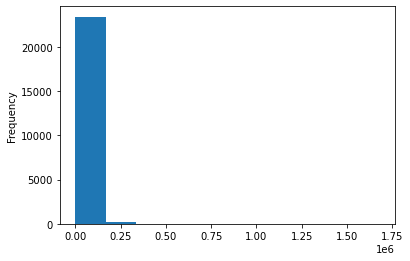

In [19]:
df['Confirmed'].plot.hist()

In [20]:
import seaborn as sn

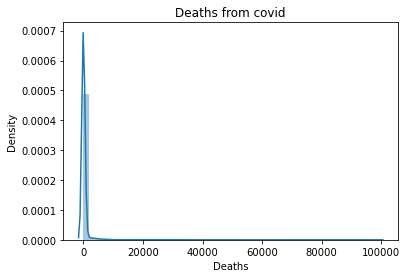

In [21]:
sn.distplot(df["Deaths"])
plt.title("Deaths from covid")
plt.show()

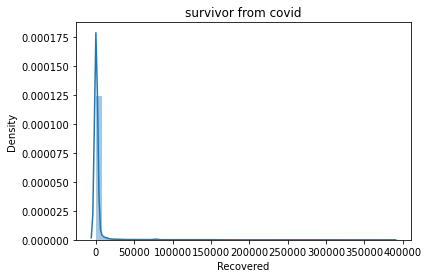

In [22]:
sn.distplot(df["Recovered"])
plt.title("survivor from covid")
plt.show()

# Bivariate analysis

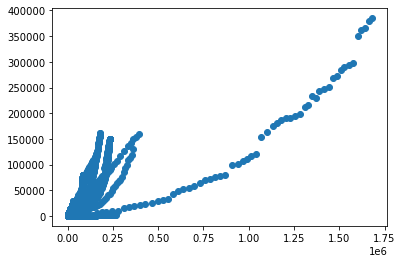

In [23]:
plt.scatter(df['Confirmed'],df['Recovered'])
plt.show()

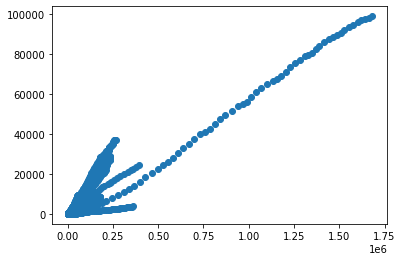

In [24]:
plt.scatter(df['Confirmed'],df['Deaths'])
plt.show()

# multivariate analysis

In [25]:
#sn.pairplot(df)

Confirmed       AxesSubplot(0.125,0.125;0.227941x0.755)
Recovered    AxesSubplot(0.398529,0.125;0.227941x0.755)
Deaths       AxesSubplot(0.672059,0.125;0.227941x0.755)
dtype: object

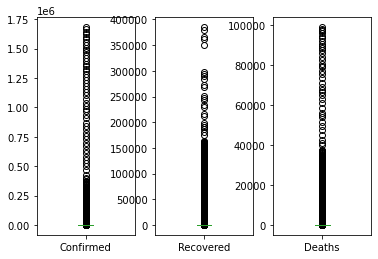

In [26]:
df.plot(kind='box',subplots=True)

<AxesSubplot:xlabel='Confirmed', ylabel='Recovered'>

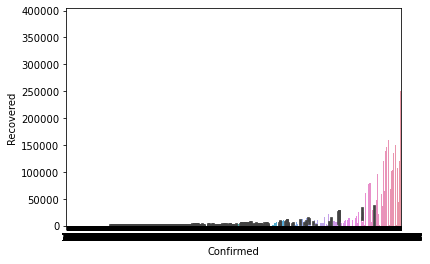

In [27]:
sn.barplot(x=df["Confirmed"],y=df["Recovered"],data=df)